In [1]:
import DEMs


In [2]:
bbox = (120570, 487570, 120970, 487870)

buildings = DEMs.Buildings(bbox).building_geometries
dems = DEMs.DEMS(bbox, buildings, bridge=True)
dtm = dems.dtm
dsm = dems.dsm
chm = DEMs.CHM(bbox, dtm, 0.25, "output", "temp")

loaded
File written to 'output/final_dtm.tif'
File written to 'output/final_dsm_over.tif'
Tiles covering the area: ['25EZ1_21']
0.5
File written to 'output\CHM.TIF'


In [3]:
import matplotlib.pyplot as plt

In [4]:
def plot_raster(array, title="DSM original"):
        plt.figure(figsize=(10, 8), facecolor="white")
        ax = plt.gca()
        ax.set_facecolor("white")
        plt.imshow(array, cmap="viridis", origin="upper")
        plt.colorbar(label="Elevation (m)")
        plt.title(title)
        plt.show()

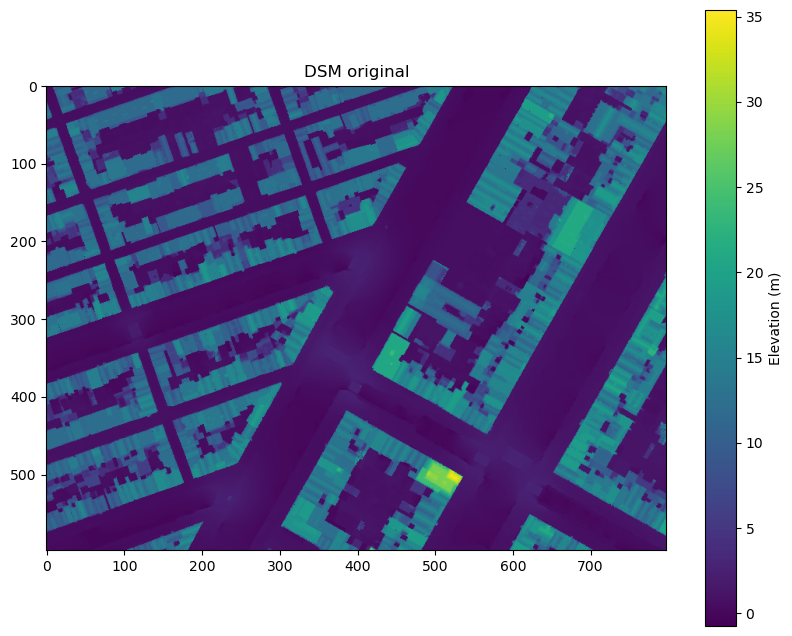

In [5]:
plot_raster(dsm)

In [6]:
remove_list = ["NL.IMBAG.Pand.0363100012172425", "NL.IMBAG.Pand.0363100012172367"]

In [7]:
dems.remove_buildings(remove_list, [])

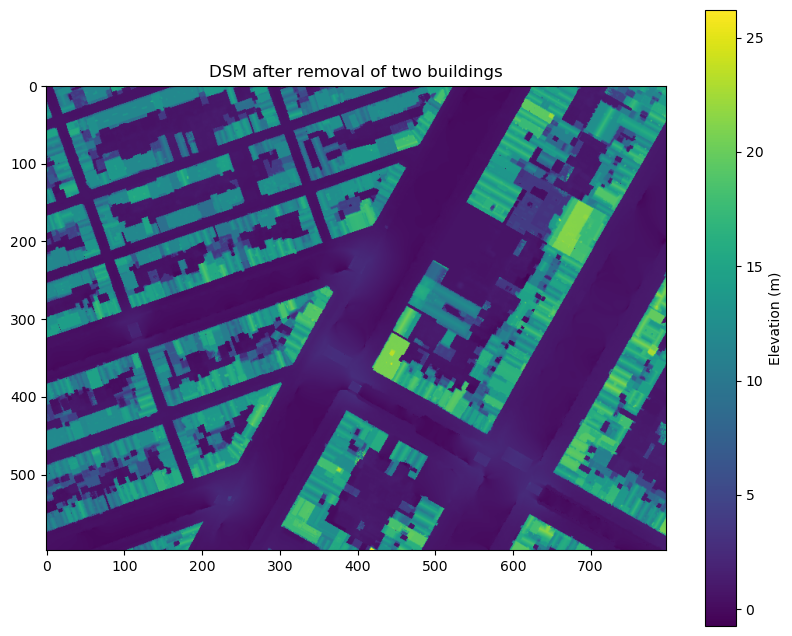

In [8]:
plot_raster(dsm, "DSM after removal of two buildings")

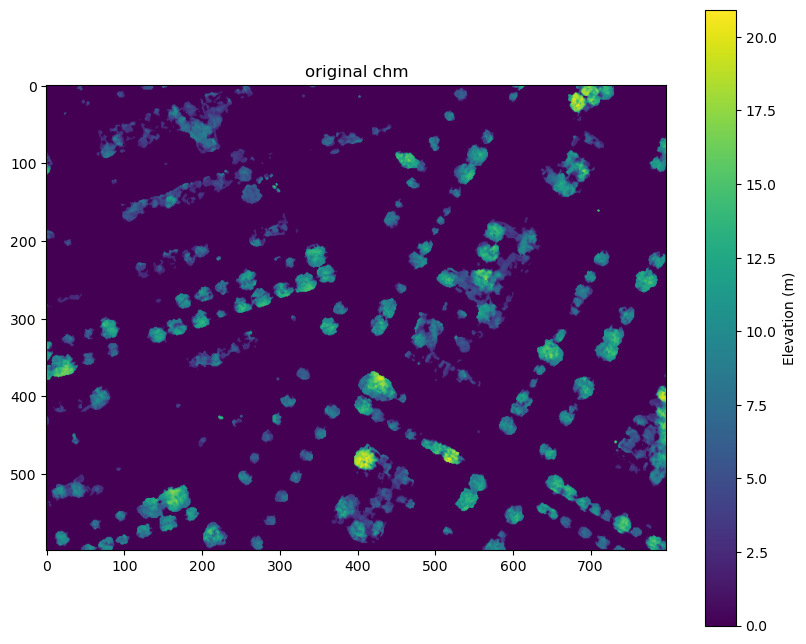

In [9]:
plot_raster(chm.chm, "original chm")

In [10]:
chm.remove_trees(1)
chm.remove_trees(2)
chm.remove_trees(3)

File written to 'output/updated_chm.tif'
File written to 'output/updated_chm.tif'
File written to 'output/updated_chm.tif'


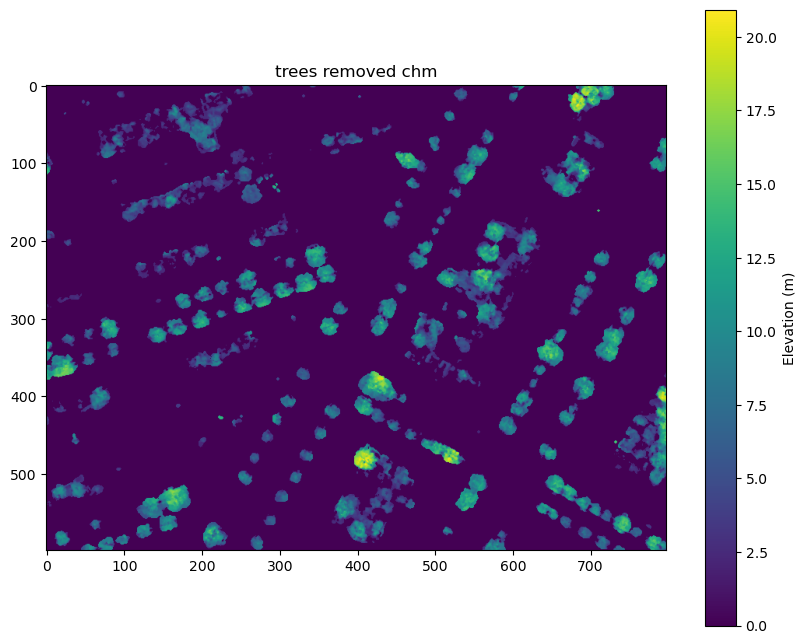

In [11]:
plot_raster(chm.chm, "trees removed chm")

In [12]:
from util.misc import saveraster
import geopandas as gpd
from shapely.geometry import shape
from pyproj import CRS

# Create a GeoDataFrame from polygons
gdf = gpd.GeoDataFrame(chm.tree_polygons, geometry=[p["geometry"] for p in chm.tree_polygons], crs=CRS.from_epsg(28992))

# Save to GeoJSON
gdf.to_file("output/tree_clusters_test.geojson", driver="GeoJSON")

In [13]:
from osgeo import gdal
dsm_path = "output/final_dsm_over.tif"
gdal_dsm = gdal.Open(dsm_path)
saveraster(gdal_dsm, "output/dsm_new_new.tif", dems.dsm)